In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
fake = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')

In [3]:
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake['target']=0

In [5]:
fake

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [6]:
true=pd.read_csv('../input/fake-and-real-news-dataset/True.csv')

In [7]:
true['target']=1

In [8]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
news=pd.concat([true, fake],)

In [ ]:
news = news[['text','target']]


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

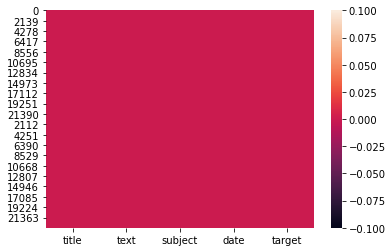

In [11]:
sns.heatmap(news.isnull())

In [12]:
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup



In [13]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [14]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [15]:
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentance in tqdm(news['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentance.strip())

100%|██████████| 44898/44898 [01:15<00:00, 597.00it/s] 


In [16]:
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(news['title'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_title.append(sentance.strip())

100%|██████████| 44898/44898 [00:16<00:00, 2696.82it/s]


In [17]:
from tqdm import tqdm
preprocessed_subject = []
# tqdm is for printing the status bar
for sentance in tqdm(news['subject'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_subject.append(sentance.strip())

100%|██████████| 44898/44898 [00:13<00:00, 3370.36it/s]


In [19]:
news['text']=preprocessed_text


In [18]:
news['title']=preprocessed_title

In [20]:
news['subject']=preprocessed_subject

In [21]:
news.head()

,title,text,subject,date,target
0,u budget fight looms republicans flip fiscal s...,washington reuters head conservative republica...,politicsnews,"December 31, 2017",1
1,u military accept transgender recruits monday ...,washington reuters transgender people allowed ...,politicsnews,"December 29, 2017",1
2,senior u republican senator let mr mueller job,washington reuters special counsel investigati...,politicsnews,"December 31, 2017",1
3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,politicsnews,"December 30, 2017",1
4,trump wants postal service charge amuch amazon...,seattle washington reuters president donald tr...,politicsnews,"December 29, 2017",1


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [54]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [24]:
news.drop(['subject','title','date'],inplace=True,axis=1)

In [26]:
from collections import Counter

# Count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [29]:
text = news.text

counter = counter_word(text)

In [30]:
len(counter)

104170

In [31]:
counter

Counter({'washington': 18725,
         'reuters': 29413,
         'head': 5167,
         'conservative': 6492,
         'republican': 25565,
         'faction': 226,
         'u': 54236,
         'congress': 10228,
         'voted': 2935,
         'month': 7742,
         'huge': 1887,
         'expansion': 654,
         'national': 15436,
         'debt': 2464,
         'pay': 4917,
         'tax': 10877,
         'cuts': 1841,
         'called': 13235,
         'fiscal': 1678,
         'sunday': 6086,
         'urged': 2087,
         'budget': 4455,
         'restraint': 154,
         'keeping': 1229,
         'sharp': 569,
         'pivot': 153,
         'way': 12652,
         'among': 6279,
         'republicans': 14159,
         'representative': 2937,
         'mark': 2622,
         'meadows': 167,
         'speaking': 3720,
         'cbs': 1115,
         'face': 4911,
         'nation': 6261,
         'drew': 1242,
         'hard': 4449,
         'line': 4019,
         'federal':

In [32]:
num_words = len(counter)

# Max number of words in a sequence
max_length = 300

In [34]:
train_size = int(news.shape[0] * 0.8)

train_sentences = news.text[:train_size]
train_labels = news.target[:train_size]

test_sentences = news.text[train_size:]
test_labels = news.target[train_size:]

In [35]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_sentences)

In [36]:
word_index = tokenizer.word_index

In [37]:
word_index

{'trump': 1,
 'said': 2,
 'not': 3,
 'u': 4,
 'would': 5,
 'president': 6,
 'people': 7,
 'reuters': 8,
 'one': 9,
 'state': 10,
 'donald': 11,
 'new': 12,
 'also': 13,
 'house': 14,
 'republican': 15,
 'government': 16,
 'states': 17,
 'no': 18,
 'clinton': 19,
 'united': 20,
 'could': 21,
 'obama': 22,
 'told': 23,
 'campaign': 24,
 'white': 25,
 'election': 26,
 'party': 27,
 'two': 28,
 'last': 29,
 'like': 30,
 'year': 31,
 'time': 32,
 'washington': 33,
 'first': 34,
 'former': 35,
 'country': 36,
 'news': 37,
 'even': 38,
 'republicans': 39,
 'percent': 40,
 'years': 41,
 'security': 42,
 'court': 43,
 'say': 44,
 'may': 45,
 'many': 46,
 'law': 47,
 'national': 48,
 'since': 49,
 'made': 50,
 'presidential': 51,
 'senate': 52,
 'right': 53,
 'make': 54,
 'administration': 55,
 'russia': 56,
 'get': 57,
 'north': 58,
 'political': 59,
 'democratic': 60,
 'going': 61,
 'american': 62,
 'hillary': 63,
 'vote': 64,
 'week': 65,
 'bill': 66,
 'support': 67,
 'called': 68,
 'back': 6

In [38]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)

In [40]:
train_sequences[100]

[33,
 8,
 60,
 135,
 2085,
 1261,
 326,
 2396,
 319,
 177,
 6376,
 3511,
 172,
 2154,
 3581,
 4,
 2320,
 334,
 3062,
 59,
 504,
 71,
 3703,
 258,
 8,
 582,
 15514,
 2459,
 1226,
 288,
 1366,
 6,
 11,
 1,
 29,
 140,
 1513,
 3511,
 1336,
 202,
 2320,
 334,
 1007,
 1366,
 3849,
 238,
 168,
 2883,
 2626,
 187,
 714,
 202,
 17976,
 2318,
 129,
 14148,
 5245,
 304,
 3511,
 23,
 195,
 227,
 140,
 592,
 623,
 186,
 59,
 5373,
 136,
 1802,
 187,
 1261,
 830,
 3878,
 3703,
 506,
 103,
 3511,
 74,
 2063,
 1524,
 11734,
 4096,
 95,
 3218,
 2933,
 1769,
 449,
 3849,
 1319,
 853,
 187,
 12359,
 4492,
 639,
 59,
 918,
 3218,
 59,
 5373,
 21,
 3368,
 440,
 495,
 574,
 1822,
 626,
 918,
 9825,
 59,
 649,
 1690,
 1261,
 2,
 8985,
 480,
 12091,
 2320,
 187,
 2497,
 1359,
 187,
 1372,
 853,
 1500,
 2708,
 146,
 578,
 312,
 624,
 1267,
 1261,
 819,
 999,
 3849,
 372,
 3511,
 1178,
 408,
 1261,
 115,
 11734,
 729,
 3511,
 2136,
 11735,
 349,
 648,
 408,
 506,
 3511,
 2318,
 1261,
 115,
 204,
 729,
 1779,
 7

In [41]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [43]:
train_padded.shape

(35918, 300)

In [44]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [47]:
print(news.text[100])
print(train_sequences[100])

100    washington reuters democratic senator elizabet...
100    former vice president joe biden asked monday m...
Name: text, dtype: object
[33, 8, 60, 135, 2085, 1261, 326, 2396, 319, 177, 6376, 3511, 172, 2154, 3581, 4, 2320, 334, 3062, 59, 504, 71, 3703, 258, 8, 582, 15514, 2459, 1226, 288, 1366, 6, 11, 1, 29, 140, 1513, 3511, 1336, 202, 2320, 334, 1007, 1366, 3849, 238, 168, 2883, 2626, 187, 714, 202, 17976, 2318, 129, 14148, 5245, 304, 3511, 23, 195, 227, 140, 592, 623, 186, 59, 5373, 136, 1802, 187, 1261, 830, 3878, 3703, 506, 103, 3511, 74, 2063, 1524, 11734, 4096, 95, 3218, 2933, 1769, 449, 3849, 1319, 853, 187, 12359, 4492, 639, 59, 918, 3218, 59, 5373, 21, 3368, 440, 495, 574, 1822, 626, 918, 9825, 59, 649, 1690, 1261, 2, 8985, 480, 12091, 2320, 187, 2497, 1359, 187, 1372, 853, 1500, 2708, 146, 578, 312, 624, 1267, 1261, 819, 999, 3849, 372, 3511, 1178, 408, 1261, 115, 11734, 729, 3511, 2136, 11735, 349, 648, 408, 506, 3511, 2318, 1261, 115, 204, 729, 1779, 732, 673, 3849, 8,

In [48]:
print(f"Shape of train {train_padded.shape}")
print(f"Shape of test {test_padded.shape}")

Shape of train (35918, 300)
Shape of test (8980, 300)


In [50]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

model = Sequential()

model.add(Embedding(num_words, 32, input_length=max_length))
model.add(LSTM(64, dropout=0.1))
#model.add(LSTM(32,dropout=0.2,activation='relu'))
model.add(Dense(1, activation="sigmoid"))


optimizer = Adam(learning_rate=3e-4)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 32)           3333440   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 3,358,337
Trainable params: 3,358,337
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(
    train_padded, train_labels, epochs=20, validation_data=(test_padded, test_labels),
)

Epoch 1/20
1123/1123 [==============================] - 203s 181ms/step - loss: 0.6900 - accuracy: 0.6055 - val_loss: 0.9110 - val_accuracy: 2.2272e-04
Epoch 2/20
1123/1123 [==============================] - 205s 183ms/step - loss: 0.6704 - accuracy: 0.5973 - val_loss: 0.9090 - val_accuracy: 2.2272e-04
Epoch 3/20
1123/1123 [==============================] - 209s 186ms/step - loss: 0.6278 - accuracy: 0.6491 - val_loss: 0.8384 - val_accuracy: 0.3626
Epoch 4/20
1123/1123 [==============================] - 211s 188ms/step - loss: 0.3873 - accuracy: 0.8255 - val_loss: 1.0626 - val_accuracy: 0.6273
Epoch 5/20
1123/1123 [==============================] - 209s 186ms/step - loss: 0.2079 - accuracy: 0.9344 - val_loss: 0.6207 - val_accuracy: 0.7596
Epoch 6/20
1123/1123 [==============================] - 208s 185ms/step - loss: 0.1568 - accuracy: 0.9587 - val_loss: 0.5213 - val_accuracy: 0.8190
Epoch 7/20
1123/1123 [==============================] - 209s 186ms/step - loss: 0.1579 - accuracy: 0.959

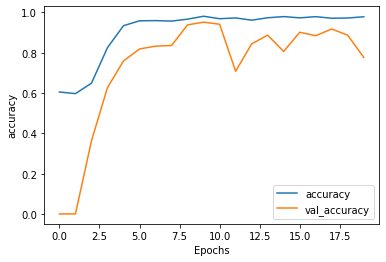

In [55]:
plot_graphs(history, 'accuracy')


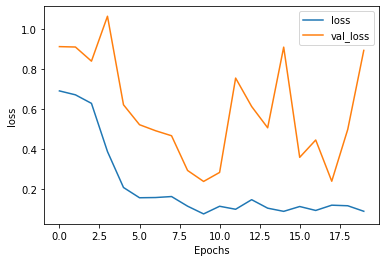

In [56]:
plot_graphs(history, 'loss')
